In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv("../Week-2_Data_Cleaning_Encoding/encoded_epl_player.csv")
df.head()


,Name,Jersey Number,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,...,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Club_encoded,Position_encoded
0,Bernd Leno,1.0,Germany,28.0,64.000000,28,16,13.198738,NaN,NaN,...,17.0,28.0,375.0,489.0,2,0,0,NaN,0,2
1,Matt Macey,33.0,England,26.0,81.700624,0,0,13.198738,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,NaN,0,2
2,Rúnar Alex Rúnarsson,13.0,Iceland,25.0,81.700624,0,0,13.198738,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,NaN,0,2
3,Héctor Bellerín,2.0,Spain,25.0,160.000000,90,37,7.000000,NaN,0.0,...,NaN,NaN,NaN,NaN,23,0,125,8.0,0,0
4,Kieran Tierney,3.0,Scotland,23.0,16.000000,7,5,1.000000,NaN,0.0,...,NaN,NaN,NaN,NaN,2,0,9,0.0,0,0


In [2]:
df[['Goals', 'Appearances', 'Passes']].head()


,Goals,Appearances,Passes
0,13.198738,64.000000,1783.000000
1,13.198738,81.700624,2747.585417
2,13.198738,81.700624,2747.585417
3,7.000000,160.000000,7125.000000
4,1.000000,16.000000,519.000000


In [3]:
minmax_scaler = MinMaxScaler()

minmax_cols = ['Goals', 'Appearances', 'Passes', 'Assists']
df_minmax = df.copy()

df_minmax[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])
df_minmax[minmax_cols].head()


,Goals,Appearances,Passes,Assists
0,0.068149,0.117100,0.099381,0.097474
1,0.068149,0.150001,0.153175,0.097474
2,0.068149,0.150001,0.153175,0.097474
3,0.033520,0.295539,0.397301,0.204819
4,0.000000,0.027881,0.028889,0.000000


In [4]:
standard_scaler = StandardScaler()

std_cols = ['Goals', 'Shots', 'Passes']
df_std = df.copy()

df_std[std_cols] = standard_scaler.fit_transform(df[std_cols])
df_std[std_cols].head()


,Goals,Shots,Passes
0,1.148847e-16,1.394166e-16,-0.326070
1,1.148847e-16,1.394166e-16,0.000000
2,1.148847e-16,1.394166e-16,0.000000
3,-4.008992e-01,1.394166e-16,1.479748
4,-7.889451e-01,1.394166e-16,-0.753354


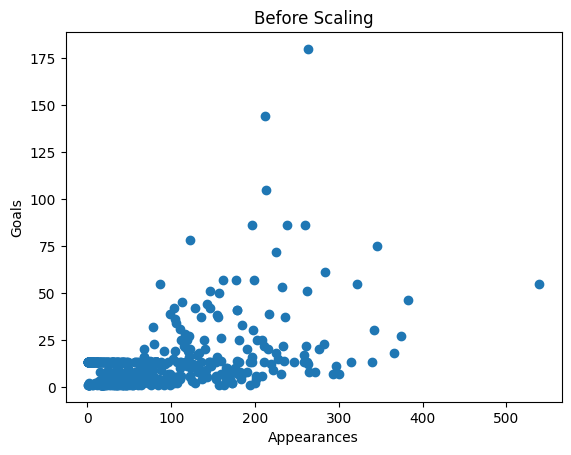

In [5]:
plt.figure()
plt.scatter(df['Appearances'], df['Goals'])
plt.xlabel("Appearances")
plt.ylabel("Goals")
plt.title("Before Scaling")
plt.show()


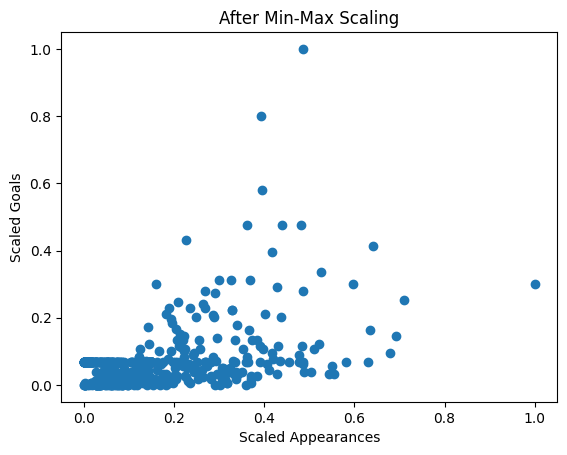

In [6]:
plt.figure()
plt.scatter(df_minmax['Appearances'], df_minmax['Goals'])
plt.xlabel("Scaled Appearances")
plt.ylabel("Scaled Goals")
plt.title("After Min-Max Scaling")
plt.show()


In [7]:
df_minmax.to_csv("minmax_scaled_epl.csv", index=False)
df_std.to_csv("standard_scaled_epl.csv", index=False)
